<a href="https://colab.research.google.com/github/chrstn-kyo/Adversarial-attacks-and-defence/blob/main/Numerical_gradient_checking_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

t = 1E-6

In [3]:
def G(V, W, X, Y):
    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)
    functionValue = (np.linalg.norm(T_1, 'fro') ** 2)
    return functionValue

In [4]:
def deltaV(V, W, X, Y):
    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)
    gradient = (2 * (T_1).dot(T_0.T))
    return gradient

In [5]:
def deltaW(V, W, X, Y):
    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)

    gradient = (2 * (((V.T).dot(T_1) * (np.ones((W.shape[0], X.shape[1])) - (T_0 ** 2)))).dot(X.T))
    return gradient

In [6]:
def deltaFDV(V, W, X, Y):
    t = 1E-6
    e = np.zeros((2,2))
    result = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            e[i][j] = 1
            result[i][j] = (G(V + t * e, W, X, Y) - G(V, W, X, Y)) / t
            e[i][j] = 0
    return result

In [124]:
def deltaFDW(V, W, X, Y):
    t = 1E-6

    e = np.zeros((2,2))
    result = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            e[i][j] = 1
            result[i][j] = (G(V, W + t * e, X, Y) - G(V, W, X, Y)) / t
            e[i][j] = 0
    return result

In [8]:
def checkGradient(V, W, X, Y):

    print('approximation error on gradient wrt V :',
          np.linalg.norm(deltaFDV(V, W, X, Y) - deltaV(V, W, X, Y)))
    print('approximation error on gradient wrt W :',
          np.linalg.norm(deltaFDV(V, W, X, Y) - deltaV(V, W, X, Y)))



In [125]:
def generateRandomData():

    V = np.random.randn(2, 2)
    W = np.random.randn(2, 2)
    X = np.random.randn(2, 2)
    Y = np.random.randn(2, 2)

    return V, W, X, Y

V, W, X, Y = generateRandomData()

print('functionValue = ', G(V, W, X, Y))
print('gradient wrt V = ', deltaV(V, W, X, Y))
print('gradient wrt W = ', deltaW(V, W, X, Y))
print('numerical gradient wrt V = ', deltaFDV(V, W, X, Y))
print('numerical gradient wrt W = ', deltaFDW(V, W, X, Y))
print('numerical gradient checking ...')
checkGradient(V, W, X, Y)

functionValue =  5.251001204453727
gradient wrt V =  [[-2.06311077 -2.92503328]
 [-1.90532968 -1.62525519]]
gradient wrt W =  [[-5.41275359  6.40068741]
 [-3.48278088  4.88689555]]
numerical gradient wrt V =  [[-2.06311027 -2.92503258]
 [-1.90532918 -1.62525449]]
numerical gradient wrt W =  [[-5.41275316  6.40068612]
 [-3.48278133  4.88689542]]
numerical gradient checking ...
approximation error on gradient wrt V : 1.2145848104679139e-06
approximation error on gradient wrt W : 1.2145848104679139e-06


In [59]:
def naivegradientdescent(V, W, X, Y, niter = 100, alpha = 0.001):
    E = np.zeros((niter,1))

    for i in range(niter):
        E[i] = G(V, W, X, Y)
        V = V - alpha*deltaV(V, W, X, Y)
        W = W - alpha*deltaW(V, W, X, Y)
    print(E[-1,:])
    plt.plot(E)
    plt.axis('tight')

In [60]:
def alternatinggradient(V, W, X, Y, niter = 100, alpha = 0.001, beta = 0.002):
    E = np.zeros((niter,1))

    for i in range(niter):
        E[i] = G(V, W, X, Y)
        V1 = V - alpha*deltaV(V, W, X, Y)
        W = W - beta*deltaW(V1, W, X, Y)
        V = V1
    print(E[-1,:])
    plt.plot(E)
    plt.axis('tight')

In [88]:
def linesearch(V1, beta = 1):
    while G(V1, W - beta*deltaW(V1, W, X, Y), X, Y) < G(V1, W, X, Y) - 0.0001*beta*(np.linalg.norm(deltaW(V1, W, X, Y), 'fro') ** 2):
        beta = beta // 2
    return beta


In [89]:
def variableprojection(V, W, X, Y, niter = 1000):

    T_0 = np.tanh((W).dot(X))
    E = np.zeros((niter,1))
    beta = 0.001
    for i in range(niter):
        E[i] = G(V, W, X, Y)

        # V1 = argmin(G(V,W, X, Y)

        # print('V :', V,
        #       'W:', W,
        #       'deltaW:', deltaW(V, W, X, Y))

        V1 = Y.dot(T_0.T).dot(np.linalg.inv(T_0.dot(T_0.T)))
        W1 = W - linesearch(V1)*deltaW(V1, W, X, Y)
        T_0 = np.tanh((W1).dot(X))
        V = V1
        W = W1

    print(E[-1,:])
    plt.plot(E)
    plt.axis('tight')

[1.0737171]


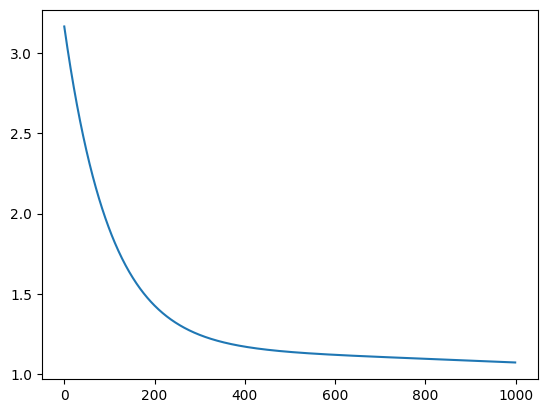

In [126]:
V, W, X, Y = generateRandomData()

naivegradientdescent(V, W, X, Y, niter=1000)

[1.00680214]


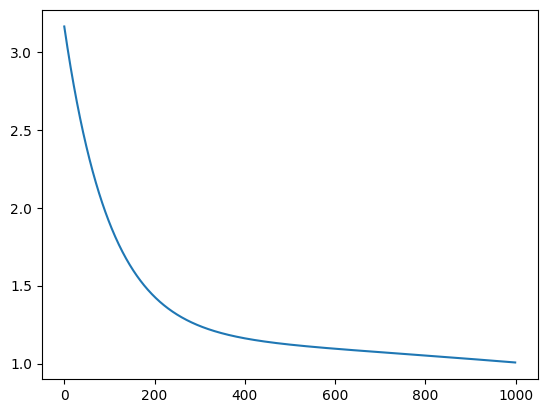

In [127]:
alternatinggradient(V, W, X, Y, niter=1000)

[3.93721323e-21]


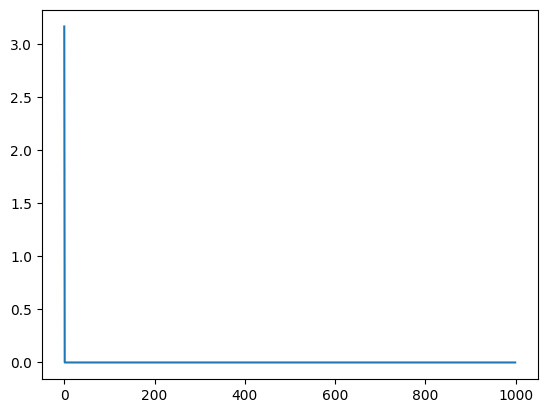

In [128]:
variableprojection(V, W, X, Y, niter=1000)